Packages

In [1]:
import nltk
from nltk import bigrams, trigrams
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import ConditionalFreqDist

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import re

In [3]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [7]:
from sklearn.model_selection import LeaveOneOut

In [8]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [9]:
df = pd.read_csv("c:\\Users\\s2421127\\Documents\\NLP Project\\ObuayaO\\NLP project\\02.09.24_ns.csv", encoding = 'unicode_escape')

In [10]:
df.head()

,EudraCT_No,Title,Phase,Objective,End_date,Sample_size,pr_endpoint,endpoint_description,Treatment,LT_followup,manual_label,Reasoning,bigrams,trigrams,pr_bigrams,pr_trigrams
0,2018-003243-39,"A Phase 3, Randomized, Double-Blind, Placebo-C...",3,The primary purpose of this study is to evalua...,NaN,175,Primary: Change From Baseline In Myasthenia Gr...,MG-ADL: 8-point questionnaire focusing on rele...,Ravulizumab,No,0,Specific to disease HRQoL questionnaire,activating notch,activating notch mutations,amifampridine phosphate,exam digitally video
1,2009-016138-29,"âRandomized, Multicenter, Open-label, Phase ...",iii,To compare the efficacy of plitidepsin in comb...,20-Nov-17,255,Primary: Progression-free Survival (Independen...,The primary study analysis was based on extern...,Aplidin,No,2,Standard surrogate outcome,angle resolution,bleed hepatic encephalopathy,consciousness awareness,delayed cerebral ischemia
2,2016-000474-38,"A Multicenter, 2-Cohort Trial to First Assess ...",0,To demonstrate that fenfluramine hydrochloride...,05-Jun-18,87,Primary: Change in Convulsive Seizure Frequenc...,Baseline-adjusted in CSF (mean number of convu...,fenfluramine hydrochloride,Yes,0,Development of disease,anticoagulant apixaban,boundary shift integral,cover orofacial,microglia activation via
3,2014-000418-75,"A Multicenter, Multinational, Randomized, Doub...",0,The primary objective of this study was to ass...,19-Jun-18,352,Primary: Change From Baseline in UHDRS-TMS at ...,"UHDRS assess motor function, cognition, behavi...",Placebo,No,0,Specific to disease HRQoL questionnaire,bacterial peritonitis,exam digitally video,deep inspiration,positron emission tomography
4,2012-002933-12,A Phase II pilot study to explore treatment wi...,ii,To determine whether patients taking a medicin...,10-Dec-18,8,"Primary: Workload',",All participants cycled on a cycle ergometer. ...,Sodium Valproate,No,1,Endpoint on function,biliary cholangitis,meld uncontrolled ascites,detect follow,well extremity truncal


Slope plot

In [ ]:
# What I want to do is find 'key' terms in the text of these subsets to then plot a slope plot
# This means I first need to join the text 
# Will do this for primary endpoint specific text and all concatenated text
# First, preprocess the text

In [11]:
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove all non-word characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.lower()  # Convert to lower case
    text = text.split()  # Split into words
    text = [lemmatizer.lemmatize(word) for word in text if word not in stopwords.words('english')]  # Lemmatize and remove stopwords # Get rid of primary as a stop word
    return ' '.join(text)

In [12]:
import unicodedata
def strip_accents(text):
    return ''. join(word for word in unicodedata.normalize ('NFD', text)
                     if unicodedata.category(word) != 'Mn')

In [13]:
df['Title'] = df['Title'].apply(preprocess_text)
df['Objective'] = df['Objective'].apply(preprocess_text)
df['pr_endpoint'] = df['pr_endpoint'].apply(preprocess_text)

In [14]:
df['endpoint_description'] = df['endpoint_description'].apply(str)

In [15]:
df['endpoint_description'] = df['endpoint_description'].apply(preprocess_text)

In [16]:
df['Title'] = df['Title'].apply(strip_accents)

In [17]:
df.head()
# Checking preprocessing

,EudraCT_No,Title,Phase,Objective,End_date,Sample_size,pr_endpoint,endpoint_description,Treatment,LT_followup,manual_label,Reasoning,bigrams,trigrams,pr_bigrams,pr_trigrams
0,2018-003243-39,phase 3 randomized double blind placebo contro...,3,primary purpose study evaluate safety efficacy...,NaN,175,primary change baseline myasthenia gravis acti...,mg adl 8 point questionnaire focusing relevant...,Ravulizumab,No,0,Specific to disease HRQoL questionnaire,activating notch,activating notch mutations,amifampridine phosphate,exam digitally video
1,2009-016138-29,a randomized multicenter open label phase iii ...,iii,compare efficacy plitidepsin combination dexam...,20-Nov-17,255,primary progression free survival independent ...,primary study analysis based externally assess...,Aplidin,No,2,Standard surrogate outcome,angle resolution,bleed hepatic encephalopathy,consciousness awareness,delayed cerebral ischemia
2,2016-000474-38,multicenter 2 cohort trial first ass pharmacok...,0,demonstrate fenfluramine hydrochloride superio...,05-Jun-18,87,primary change convulsive seizure frequency cs...,baseline adjusted csf mean number convulsive s...,fenfluramine hydrochloride,Yes,0,Development of disease,anticoagulant apixaban,boundary shift integral,cover orofacial,microglia activation via
3,2014-000418-75,multicenter multinational randomized double bl...,0,primary objective study ass efficacy laquinimo...,19-Jun-18,352,primary change baseline uhdrs tm week 52,uhdrs ass motor function cognition behaviour f...,Placebo,No,0,Specific to disease HRQoL questionnaire,bacterial peritonitis,exam digitally video,deep inspiration,positron emission tomography
4,2012-002933-12,phase ii pilot study explore treatment sodium ...,ii,determine whether patient taking medicine call...,10-Dec-18,8,primary workload,participant cycled cycle ergometer oxygen cons...,Sodium Valproate,No,1,Endpoint on function,biliary cholangitis,meld uncontrolled ascites,detect follow,well extremity truncal


In [18]:
# Seperating the dataset by labelled primary endpoint type
pfo_df = df[df['manual_label'] == 0]
io_df = df[df['manual_label']== 1]
so_df = df[df['manual_label']== 2]

In [19]:
io_df.head()
# Sanity check

,EudraCT_No,Title,Phase,Objective,End_date,Sample_size,pr_endpoint,endpoint_description,Treatment,LT_followup,manual_label,Reasoning,bigrams,trigrams,pr_bigrams,pr_trigrams
4,2012-002933-12,phase ii pilot study explore treatment sodium ...,ii,determine whether patient taking medicine call...,10-Dec-18,8,primary workload,participant cycled cycle ergometer oxygen cons...,Sodium Valproate,No,1,Endpoint on function,biliary cholangitis,meld uncontrolled ascites,detect follow,well extremity truncal
8,2018-004406-25,effect n acetyl l leucine gm2 gangliosidosis t...,ii,primary objective evaluate efficacy n acetyl l...,09-Jan-23,30,primary clinical impression change severity ci c,primary efficacy endpoint based blinded raters...,N-Acetyl-L-Leucine,No,1,Endpoint on function,consciousness awareness,pantothenate neurodegeneration pkan,microglia activation,central raters experts
14,2010-021850-20,estudio multica ntrico de fase 3 de retirada a...,3,purpose study lm 002 evaluate efficacy safety ...,08-Jul-16,54,primary change qmg score baseline day 14,qmg physician rated test including 13 assessme...,Amifampridine phosphate,Yes,1,Endpoint on function,exam digitally,superoxide dismutase mutation,resorption marker,restricted wheelchair unable
25,2016-001177-32,multicenter phase ii safety preliminary effica...,ii,ass safety different dose regimen hepastem cir...,21-Aug-20,24,primary adverse event reported day 28 active s...,adverse event aes assessed seriousness severit...,No investigational medicinal product assigned ...,Yes,1,Development of disease in a given time frame,notch mutations,minimal angle resolution,delayed cerebral,raters experts movement
34,2014-005413-23,phase 3 multi national double blind randomized...,3,primary objective ass effect tirasemtiv versus...,27-Sep-17,744,primary change percent predicted slow vital ca...,respiratory assessment consisted svc svc measu...,Tirasemtiv,No,1,Endpoint of function,trientine tetrahydrochloride,necrotizing autoimmune myopathy,interactive voice,none minimal mild


In [20]:
# Python keeps warning me about something so I made copies
pfo_df = pfo_df.copy()
io_df = io_df.copy()
so_df = so_df.copy()

In [23]:
# Primary endpoint relavent text data. Just change prefix to the relavent df
pfo_df['concat_corpus'] = pfo_df['Title']+ " " + pfo_df['Objective'] + " " + pfo_df['pr_endpoint'] + " " + pfo_df['endpoint_description']
io_df['concat_corpus'] = io_df['Title']+ " " + io_df['Objective'] + " " + io_df['pr_endpoint'] + " " + io_df['endpoint_description']
so_df['concat_corpus'] = so_df['Title']+ " " + so_df['Objective'] + " " +so_df['pr_endpoint'] + " " + so_df['endpoint_description']

In [24]:
pfo_df.head()
#Sanity check

,EudraCT_No,Title,Phase,Objective,End_date,Sample_size,pr_endpoint,endpoint_description,Treatment,LT_followup,manual_label,Reasoning,bigrams,trigrams,pr_bigrams,pr_trigrams,primary_corpus,concat_corpus
0,2018-003243-39,phase 3 randomized double blind placebo contro...,3,primary purpose study evaluate safety efficacy...,NaN,175,primary change baseline myasthenia gravis acti...,mg adl 8 point questionnaire focusing relevant...,Ravulizumab,No,0,Specific to disease HRQoL questionnaire,activating notch,activating notch mutations,amifampridine phosphate,exam digitally video,phase 3 randomized double blind placebo contro...,phase 3 randomized double blind placebo contro...
2,2016-000474-38,multicenter 2 cohort trial first ass pharmacok...,0,demonstrate fenfluramine hydrochloride superio...,05-Jun-18,87,primary change convulsive seizure frequency cs...,baseline adjusted csf mean number convulsive s...,fenfluramine hydrochloride,Yes,0,Development of disease,anticoagulant apixaban,boundary shift integral,cover orofacial,microglia activation via,multicenter 2 cohort trial first ass pharmacok...,multicenter 2 cohort trial first ass pharmacok...
3,2014-000418-75,multicenter multinational randomized double bl...,0,primary objective study ass efficacy laquinimo...,19-Jun-18,352,primary change baseline uhdrs tm week 52,uhdrs ass motor function cognition behaviour f...,Placebo,No,0,Specific to disease HRQoL questionnaire,bacterial peritonitis,exam digitally video,deep inspiration,positron emission tomography,multicenter multinational randomized double bl...,multicenter multinational randomized double bl...
5,2012-000928-18,double blind randomised prospective placebo co...,iii,ass efficacy egcg v placebo reduce progression...,16-Sep-16,92,primary score motor examination umsars baselin...,primary endpoint change baseline week 52 motor...,Placebo (mannitol),No,0,Specific to disease HRQoL questionnaire,bleed hepatic,spontaneous bacterial peritonitis,digitally video,cover orofacial movements,double blind randomised prospective placebo co...,double blind randomised prospective placebo co...
7,2019-001100-38,randomized double blind placebo controlled par...,0,evaluate efficacy verdiperstat bhv 3241 compar...,30-Jun-22,336,primary change baseline modified umsars score ...,nan,Verdiperstat,No,0,Specific to disease HRQoL questionnaire,cerebrospinal fluid,behavioral variant frontotemporal,intervention prevent,orofacial movements well,randomized double blind placebo controlled par...,randomized double blind placebo controlled par...


In [41]:
# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()
# Fit the vectorizer to the data and transform it into a TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(so_df['concat_corpus'])
so_tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print(so_tfidf_df)

    06730512       076        10       100      1000      1002    100mg  \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
2   0.000000  0.000000  0.049990  0.000000  0.000000  0.000000  0.00000   
3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
5   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
6   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
7   0.000000  0.000000  0.052840  0.000000  0.000000  0.000000  0.00000   
8   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
9   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
10  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
11  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
12  0.000000  0.000000  0

In [42]:
so_tfidf_scores = np.asarray(tfidf_matrix.mean(axis=0)).ravel()

In [43]:
feature_names = vectorizer.get_feature_names_out()

In [44]:
so_tfidf_df_list = pd.DataFrame({'word': feature_names, 'tfidf_score': so_tfidf_scores})

In [45]:
so_tfidf = so_tfidf_df_list.sort_values(by='tfidf_score', ascending=False)

In [46]:
top_n = 1179

In [47]:
print(so_tfidf.head(top_n))

             word  tfidf_score
937      response     0.048554
347       disease     0.048479
1032      subject     0.044940
854   progression     0.044122
772       patient     0.041039
...           ...          ...
559      inositol     0.001069
274     consisted     0.001069
38            394     0.001069
165   biochemical     0.001069
738       nucleus     0.001069

[1179 rows x 2 columns]


In [48]:
so_tfidf.head(top_n).to_csv('All tf-idf so.csv', index=False)

In [50]:
# See the features that share commonality and plot tf-idf values across the protocols. I think that's what SL was saying 
pfo_tfidf_df = pd.read_csv("c:\\Users\\s2421127\\Documents\\NLP Project\\ObuayaO\\NLP project\\Chapter 2 Project\\All tf-idf pfo.csv", encoding = 'unicode_escape')
so_tfidf_df = pd.read_csv("c:\\Users\\s2421127\\Documents\\NLP Project\\ObuayaO\\NLP project\\Chapter 2 Project\\All tf-idf so.csv", encoding = 'unicode_escape')
io_tfidf_df = pd.read_csv("c:\\Users\\s2421127\\Documents\\NLP Project\\ObuayaO\\NLP project\\Chapter 2 Project\\All tf-idf io.csv", encoding = 'unicode_escape')

In [51]:
merged_df = pfo_tfidf_df.merge(io_tfidf_df, on='word', suffixes=('_pfo', '_io'))
merged_df = merged_df.merge(so_tfidf_df, on='word')
merged_df.rename(columns={'tfidf_score': 'tfidf_score_so'}, inplace=True)

In [52]:
merged_df.head()

,word,tfidf_score_pfo,tfidf_score_io,tfidf_score_so
0,study,0.052137,0.047555,0.039252
1,subject,0.042159,0.025525,0.044940
2,score,0.041942,0.071419,0.002369
3,treatment,0.041812,0.045179,0.037543
4,safety,0.041419,0.038666,0.030659


In [53]:
# There's too many features so I need to cut 
merged_df['max_diff'] = merged_df[['tfidf_score_pfo', 'tfidf_score_io', 'tfidf_score_so']].max(axis=1) - \
                        merged_df[['tfidf_score_pfo', 'tfidf_score_io', 'tfidf_score_so']].min(axis=1)

sorted_df = merged_df.sort_values(by='max_diff', ascending=False)

top_features_df = sorted_df.head(15)
print(top_features_df)

            word  tfidf_score_pfo  tfidf_score_io  tfidf_score_so  max_diff
2          score         0.041942        0.071419        0.002369  0.069050
46      response         0.015536        0.002729        0.048554  0.045825
223  progression         0.003007        0.003700        0.044122  0.041115
87      function         0.009968        0.042445        0.004853  0.037592
54            al         0.013854        0.040403        0.006626  0.033777
5          event         0.041135        0.007639        0.012468  0.033496
29         scale         0.020432        0.035867        0.003206  0.032662
204           ci         0.003583        0.035969        0.005660  0.032386
42       disease         0.016568        0.026149        0.048479  0.031912
78         motor         0.010846        0.032090        0.003122  0.028968
45         total         0.015785        0.035631        0.007217  0.028414
53         daily         0.014010        0.031446        0.003251  0.028195
117         

In [54]:
top_features_df = top_features_df.copy()

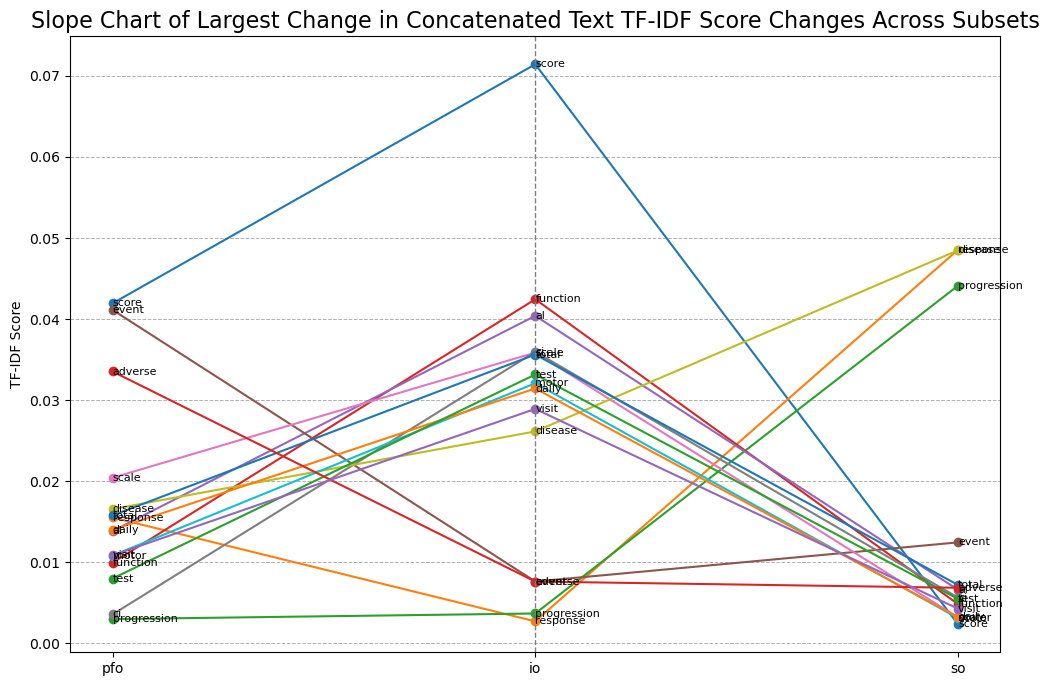

In [55]:
fig, ax = plt.subplots(figsize=(12, 8))

jitter_strength = 0.4

for i in range(len(top_features_df)):
    x_positions = np.array([0, 1, 2]) + np.random.normal(0, jitter_strength, size=3)
    ax.plot(['pfo', 'io', 'so'], 
            [top_features_df.iloc[i]['tfidf_score_pfo'], top_features_df.iloc[i]['tfidf_score_io'], top_features_df.iloc[i]['tfidf_score_so']],
            marker='o', label=merged_df['word'][i])

for i, word in enumerate(top_features_df['word']):
    for j, subset in enumerate(['pfo', 'io', 'so']):
        ax.text(j, top_features_df.iloc[i, j+1], f'{word}', verticalalignment='center', fontsize=8)

ax.axvline(x=1, color='gray', linestyle='--', linewidth=1) 

# Customize the plot
ax.set_title('Slope Chart of Largest Change in Concatenated Text TF-IDF Score Changes Across Subsets', fontsize=16)
ax.set_ylabel('TF-IDF Score')
ax.set_xticks(['pfo', 'io', 'so'])
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

# Display the slope chart
plt.show()

In [56]:
# Concordance analysis on terms to see if there is any significant difference between the terms in each subset

concordance_df = merged_df[['word', 'tfidf_score_pfo', 'tfidf_score_io', 'tfidf_score_so']]
correlation_matrix = concordance_df[['tfidf_score_pfo', 'tfidf_score_io', 'tfidf_score_so']].corr()
print(correlation_matrix)

# Pretty high correlation between the terms and the different primary endpoint types

                 tfidf_score_pfo  tfidf_score_io  tfidf_score_so
tfidf_score_pfo         1.000000        0.726218        0.661428
tfidf_score_io          0.726218        1.000000        0.514371
tfidf_score_so          0.661428        0.514371        1.000000


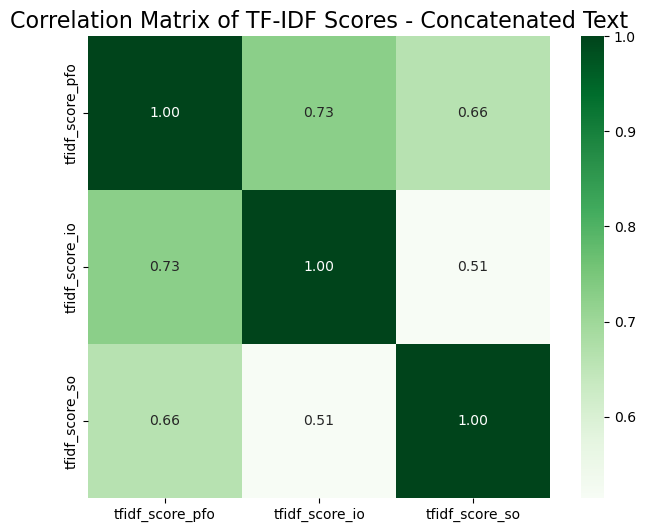

In [57]:
plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Greens', square=True)

plt.title('Correlation Matrix of TF-IDF Scores - Concatenated Text', fontsize=16)
plt.show()

In [58]:
# Pairwise comparison
concordance_df['pfo_io_diff'] = concordance_df['tfidf_score_pfo'] - concordance_df['tfidf_score_io']
concordance_df['pfo_so_diff'] = concordance_df['tfidf_score_pfo'] - concordance_df['tfidf_score_so']
concordance_df['io_so_diff'] = concordance_df['tfidf_score_io'] - concordance_df['tfidf_score_so']

print(concordance_df[['word', 'pfo_io_diff', 'pfo_so_diff', 'io_so_diff']])

              word  pfo_io_diff  pfo_so_diff  io_so_diff
0            study     0.004582     0.012885    0.008303
1          subject     0.016633    -0.002781   -0.019415
2            score    -0.029477     0.039573    0.069050
3        treatment    -0.003367     0.004270    0.007637
4           safety     0.002752     0.010759    0.008007
..             ...          ...          ...         ...
292        confirm    -0.013561    -0.001291    0.012270
293  investigating    -0.007938    -0.001733    0.006205
294      evaluable    -0.002737    -0.005927   -0.003190
295         longer    -0.001691    -0.003116   -0.001425
296     additional    -0.004136    -0.001624    0.002513

[297 rows x 4 columns]


In [59]:
concordance_df = concordance_df[['word', 'pfo_io_diff', 'pfo_so_diff', 'io_so_diff']].sort_values(by='pfo_io_diff', ascending=False)

In [60]:
concordance_df.head()
# Marginal differences in tf-idf scores between each primary outcome type. No great significance either way

,word,pfo_io_diff,pfo_so_diff,io_so_diff
5,event,0.033496,0.028666,-0.004829
11,adverse,0.025899,0.026667,0.000769
1,subject,0.016633,-0.002781,-0.019415
19,term,0.015158,0.012545,-0.002613
30,number,0.013933,0.009658,-0.004276


In [61]:
concordance_df[['word', 'pfo_io_diff', 'pfo_so_diff', 'io_so_diff']].to_csv('concordance_concatenated_text.csv', index=False)

LOOCV

In [62]:
df['concat_corpus'] = df['Title']+ " " + df['Objective'] + " " + df['pr_endpoint'] + " " + df['endpoint_description']
df.head()

,EudraCT_No,Title,Phase,Objective,End_date,Sample_size,pr_endpoint,endpoint_description,Treatment,LT_followup,manual_label,Reasoning,bigrams,trigrams,pr_bigrams,pr_trigrams,concat_corpus
0,2018-003243-39,phase 3 randomized double blind placebo contro...,3,primary purpose study evaluate safety efficacy...,NaN,175,primary change baseline myasthenia gravis acti...,mg adl 8 point questionnaire focusing relevant...,Ravulizumab,No,0,Specific to disease HRQoL questionnaire,activating notch,activating notch mutations,amifampridine phosphate,exam digitally video,phase 3 randomized double blind placebo contro...
1,2009-016138-29,a randomized multicenter open label phase iii ...,iii,compare efficacy plitidepsin combination dexam...,20-Nov-17,255,primary progression free survival independent ...,primary study analysis based externally assess...,Aplidin,No,2,Standard surrogate outcome,angle resolution,bleed hepatic encephalopathy,consciousness awareness,delayed cerebral ischemia,a randomized multicenter open label phase iii ...
2,2016-000474-38,multicenter 2 cohort trial first ass pharmacok...,0,demonstrate fenfluramine hydrochloride superio...,05-Jun-18,87,primary change convulsive seizure frequency cs...,baseline adjusted csf mean number convulsive s...,fenfluramine hydrochloride,Yes,0,Development of disease,anticoagulant apixaban,boundary shift integral,cover orofacial,microglia activation via,multicenter 2 cohort trial first ass pharmacok...
3,2014-000418-75,multicenter multinational randomized double bl...,0,primary objective study ass efficacy laquinimo...,19-Jun-18,352,primary change baseline uhdrs tm week 52,uhdrs ass motor function cognition behaviour f...,Placebo,No,0,Specific to disease HRQoL questionnaire,bacterial peritonitis,exam digitally video,deep inspiration,positron emission tomography,multicenter multinational randomized double bl...
4,2012-002933-12,phase ii pilot study explore treatment sodium ...,ii,determine whether patient taking medicine call...,10-Dec-18,8,primary workload,participant cycled cycle ergometer oxygen cons...,Sodium Valproate,No,1,Endpoint on function,biliary cholangitis,meld uncontrolled ascites,detect follow,well extremity truncal,phase ii pilot study explore treatment sodium ...


In [63]:
tfidf_matrix = vectorizer.fit_transform(df['concat_corpus'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [64]:
X = tfidf_df
y = df['manual_label'].values

In [66]:
print("Initial DataFrame shape:", df.shape)
df.dropna(subset=['concat_corpus', 'manual_label'], inplace=True)  # Drop rows with NaN values in relevant columns
print("Shape after dropping NaNs:", df.shape)

Initial DataFrame shape: (190, 17)
Shape after dropping NaNs: (190, 17)


In [67]:
print(f'Features shape: {X.shape}, Target shape: {y.shape}')

Features shape: (190, 2899), Target shape: (190,)


In [68]:
if X.shape[0] != y.shape[0]:
    raise ValueError("Features and target variable have inconsistent number of samples.")

In [69]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 4)

In [70]:
loo = LeaveOneOut()
predictions = []
actuals = []

In [71]:
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    rfc.fit(X_train, y_train)

    y_pred = rfc.predict(X_test)

    predictions.append(y_pred[0])
    actuals.append(y_test[0])

In [72]:
accuracy = accuracy_score(actuals, predictions)
precision = precision_score(actuals, predictions, average='weighted')
recall = recall_score(actuals, predictions, average='weighted')

print(f'LOOCV Accuracy: {accuracy:.2f}')
print(f'LOOCV Precision: {precision:.2f}')
print(f'LOOCV Recall: {recall:.2f}')

LOOCV Accuracy: 0.71
LOOCV Precision: 0.77
LOOCV Recall: 0.71


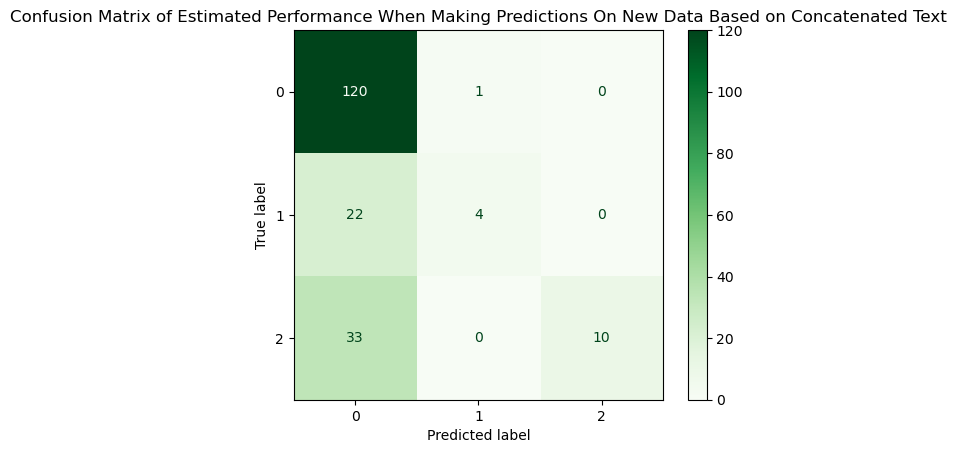

In [73]:
conf_matrix = confusion_matrix(actuals, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rfc.classes_)
disp.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix of Estimated Performance When Making Predictions On New Data Based on Concatenated Text')
plt.show()